# Importing Modules

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sea

In [3]:
# Reading the file :
train = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
test = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


Here, 'subscribed' is the Target variable as its not there int the test file.

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

# Univariate Analysis

In [7]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

<AxesSubplot:>

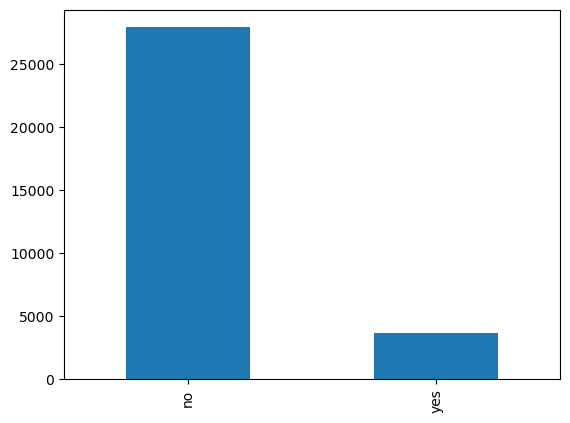

In [8]:
train['subscribed'].value_counts().plot.bar()

So, out of total 31647, only 3715 have subscribed.
Now, looking into 'job' variable :

In [9]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

<AxesSubplot:>

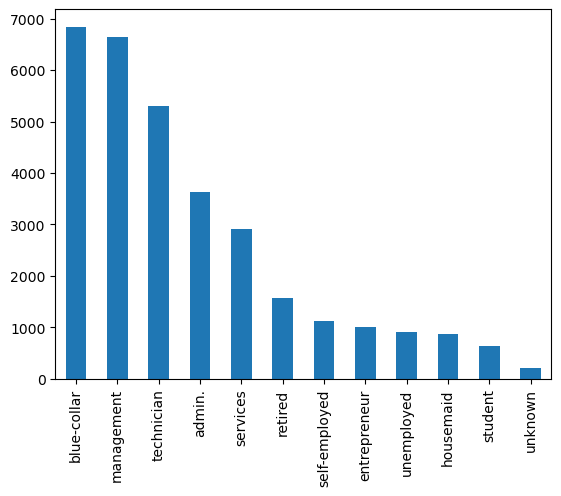

In [10]:
train['job'].value_counts().plot.bar()

# Bivariate Analysis

To know whether how many people are subscribed in each job category :

<AxesSubplot:xlabel='job,subscribed'>

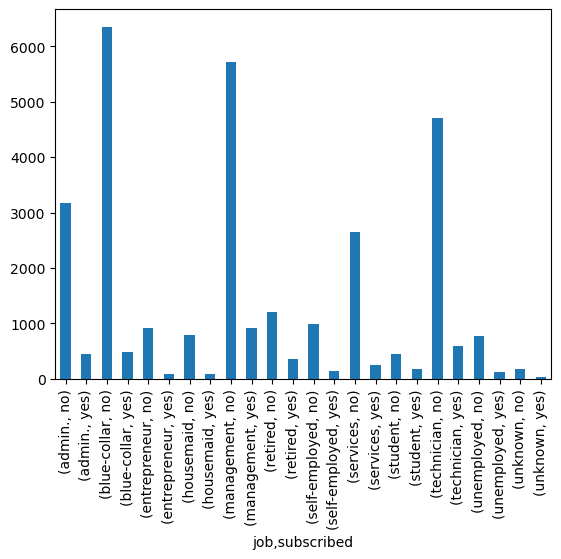

In [11]:
train.groupby('job')['subscribed'].value_counts().plot.bar()

<AxesSubplot:xlabel='default,subscribed'>

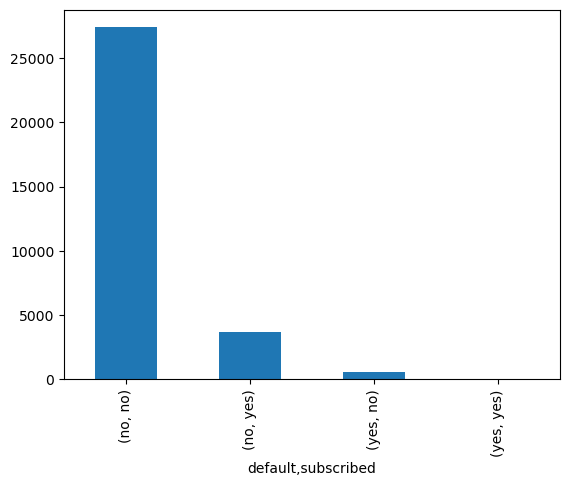

In [12]:
train.groupby('default')['subscribed'].value_counts().plot.bar()

From the above (default, subscribed) we can infer that the client who has no previous default is more likely to subscribe than the client who is having previous default.

Correlations :

In [13]:
train['subscribed'].replace('no', 0, inplace = True)
train['subscribed'].replace('yes', 1, inplace = True)

In [14]:
corr = train[['age', 'balance', 'day', 'duration', 'pdays', 'previous', 'subscribed']].corr()
corr

,age,balance,day,duration,pdays,previous,subscribed
age,1.000000,0.103245,-0.011056,-0.003870,-0.021947,0.005761,0.024538
balance,0.103245,1.000000,0.003461,0.024274,0.001789,0.013843,0.050807
day,-0.011056,0.003461,1.000000,-0.032288,-0.087626,-0.048752,-0.029600
duration,-0.003870,0.024274,-0.032288,1.000000,0.000529,0.001783,0.389838
pdays,-0.021947,0.001789,-0.087626,0.000529,1.000000,0.428938,0.108290
previous,0.005761,0.013843,-0.048752,0.001783,0.428938,1.000000,0.088081
subscribed,0.024538,0.050807,-0.029600,0.389838,0.108290,0.088081,1.000000


<AxesSubplot:>

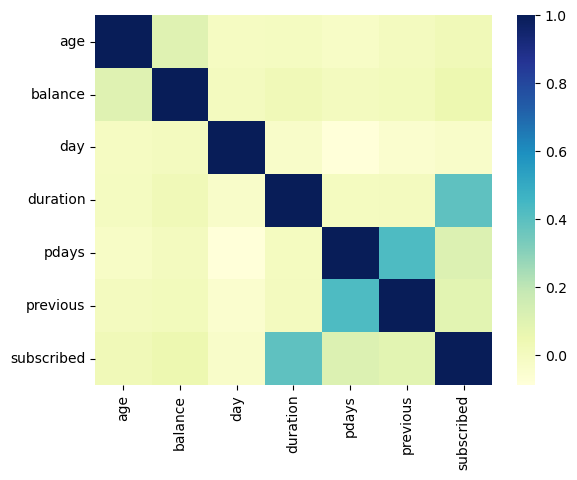

In [15]:
sea.heatmap(corr, cmap="YlGnBu")

From the above correlation plot, we can infer that duration of call is correlated well with the target varibale that any other independent variables.

In [16]:
train['subscribed'].replace(0, 'no', inplace = True)
train['subscribed'].replace(1, 'yes', inplace = True)

# Logistic Regression Algorithm

Extracting Independent and Dependent variables from train and test datasets repectively.

In [17]:
x_train = train.drop('subscribed', axis = 1)
y_train = train['subscribed']
# Getting dummies to convert Categorical variables into columns.
x_train = pd.get_dummies(x_train)
test = pd.get_dummies(test)
x_train.head()

,ID,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
y_train.head()

0     no
1     no
2     no
3    yes
4     no
Name: subscribed, dtype: object

In [19]:
# Assigning the object lreg to the class LogisticRegression :
lreg = LogisticRegression()
# Training the model :
lreg.fit(x_train, y_train)

C:\Users\Nirav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Predicting the dependent variable for the test dataset :
pred = lreg.predict(test)

In [21]:
lreg.score(x_train, y_train)

0.8909533289095333

In [22]:
lreg.score(test, pred)

1.0

As the prediction score is 1, its a good prediction and the Logistic Regression Algorithm can be used for this dataset.

<AxesSubplot:>

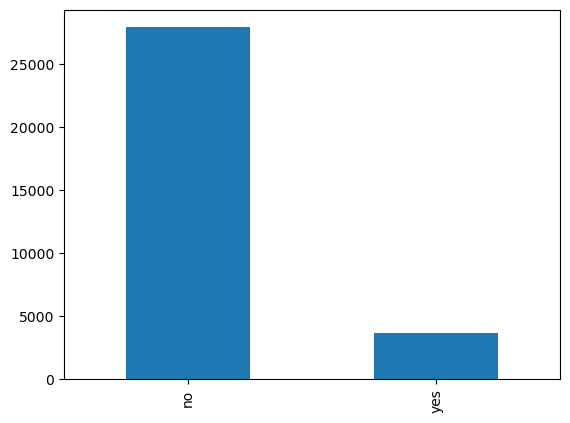

In [23]:
y_train.value_counts().plot.bar()

<AxesSubplot:>

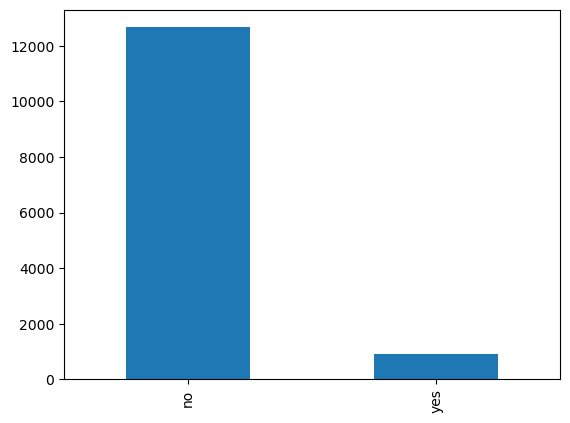

In [24]:
pd.Series(pred).value_counts().plot.bar()